In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import seaborn as sns
import numpy as np
from math import pi
from pandas.plotting import parallel_coordinates

In [17]:
df = pd.read_csv('nba2021_advanced.csv')

In [18]:
df.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa,PF,21,MIA,28,408,15.1,0.599,0.000,0.541,10.5,19.8,15.4,6.8,1.4,3.8,16.1,19.7,0.3,0.6,0.9,0.101,-2.8,-0.2,-3.0,-0.1
1,Jaylen Adams,PG,24,MIL,6,17,-6.9,0.125,0.250,0.000,0.0,18.2,9.4,13.4,0.0,0.0,0.0,19.7,-0.1,0.0,-0.1,-0.265,-15.6,-5.2,-20.9,-0.1
2,Steven Adams,C,27,NOP,27,760,15.9,0.592,0.006,0.397,16.9,18.0,17.5,10.1,1.7,2.0,20.1,12.8,1.2,0.5,1.7,0.109,-0.1,-1.0,-1.1,0.2
3,Bam Adebayo,C,23,MIA,26,873,22.7,0.641,0.015,0.469,6.8,23.2,15.4,27.9,1.4,3.2,16.2,24.6,2.3,1.3,3.6,0.196,2.9,2.0,4.9,1.5
4,LaMarcus Aldridge,C,35,SAS,18,480,15.2,0.542,0.298,0.093,3.2,14.0,8.4,11.4,0.7,2.8,6.4,22.3,0.2,0.5,0.7,0.075,0.3,-1.0,-0.7,0.2


In [20]:
df1 = df[df["Tm"].isin(['ATL', 'BOS', 'BRK', 'CHI', 'CHO'])]
df1 = df1[['Tm', 'ORB%', 'TRB%', 'AST%', 'BLK%', 'USG%']]
df1 = df1.groupby('Tm').mean()
df1.head()

,ORB%,TRB%,AST%,BLK%,USG%
Tm,,,,,
ATL,5.250000,10.400000,13.893750,1.718750,18.412500
BOS,5.681250,10.362500,12.881250,2.437500,18.325000
BRK,4.394737,10.547368,15.210526,2.147368,18.868421
CHI,4.482353,10.976471,13.500000,1.405882,17.582353
CHO,7.628571,11.742857,14.900000,2.764286,19.357143


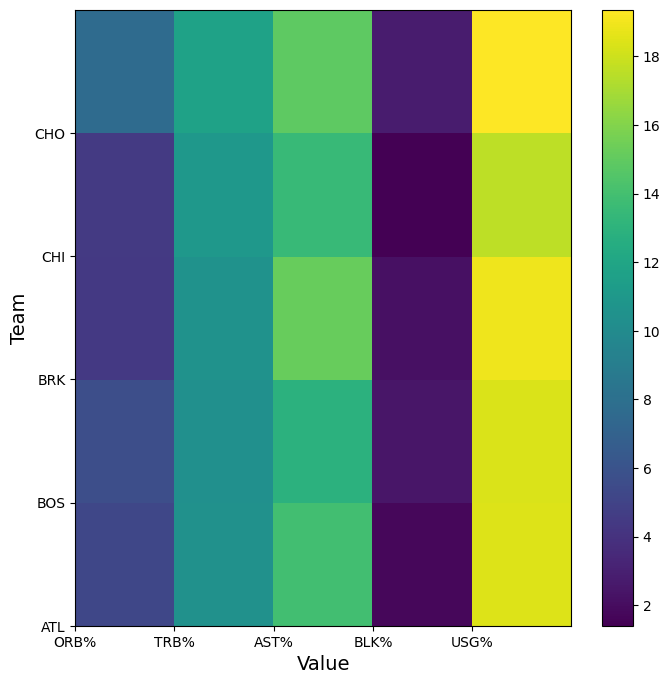

In [23]:
fig = plt.figure(figsize = (8,8))
fig.set_facecolor('white')
plt.pcolor(df1.values)

plt.xticks(range((len(df1.columns))),df1.columns)
plt.yticks(range(len(df1.index)), df1.index)

plt.xlabel('Value', fontsize = 14)
plt.ylabel('Team', fontsize = 14)
plt.colorbar()
plt.show()

In [24]:
df2 = df[df["Tm"].isin(['ATL', 'BOS', 'BRK', 'CHI', 'CHO'])]
df2 = df2[['Tm', 'Age', 'G']]
df2 = df2.groupby(['Tm', 'Age']).mean().reset_index()

df2 = df2.pivot(index = "Tm", columns = 'Age', values = "G")
df2.head()

Age,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34
Tm,,,,,,,,,,,,,,,
ATL,NaN,9.0,24.0,23.000000,16.250000,NaN,22.000000,25.0,NaN,9.0,21.5,NaN,NaN,16.0,14.0
BOS,NaN,NaN,13.0,20.000000,17.333333,26.0,6.000000,22.0,18.0,26.0,26.0,13.0,NaN,23.0,NaN
BRK,NaN,14.0,NaN,8.500000,26.000000,26.0,15.000000,12.0,3.0,16.5,30.0,NaN,16.0,23.5,30.0
CHI,26.0,27.0,8.5,15.000000,14.000000,7.0,16.500000,11.0,19.5,6.0,16.0,NaN,NaN,23.0,26.0
CHO,15.5,NaN,NaN,22.333333,9.000000,NaN,21.666667,26.0,NaN,20.5,NaN,26.0,NaN,NaN,NaN


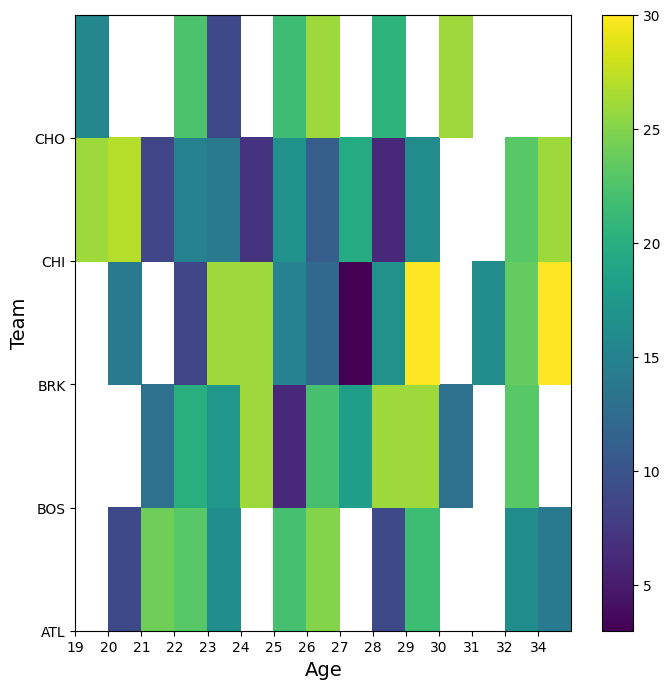

In [25]:
fig = plt.figure(figsize = (8,8))
fig.set_facecolor('white')
plt.pcolor(df2.values)

plt.xticks(range((len(df2.columns))),df2.columns)
plt.yticks(range(len(df2.index)), df2.index)

plt.xlabel('Age', fontsize = 14)
plt.ylabel('Team', fontsize = 14)
plt.colorbar()
plt.show()

In [26]:
df3 = df1.reset_index()
df3.head()

,Tm,ORB%,TRB%,AST%,BLK%,USG%
0,ATL,5.250000,10.400000,13.893750,1.718750,18.412500
1,BOS,5.681250,10.362500,12.881250,2.437500,18.325000
2,BRK,4.394737,10.547368,15.210526,2.147368,18.868421
3,CHI,4.482353,10.976471,13.500000,1.405882,17.582353
4,CHO,7.628571,11.742857,14.900000,2.764286,19.357143


C:\Users\cw3714\AppData\Local\Temp\ipykernel_21256\1711389176.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  my_palette = plt.cm.get_cmap("Set2", len(df3.index))


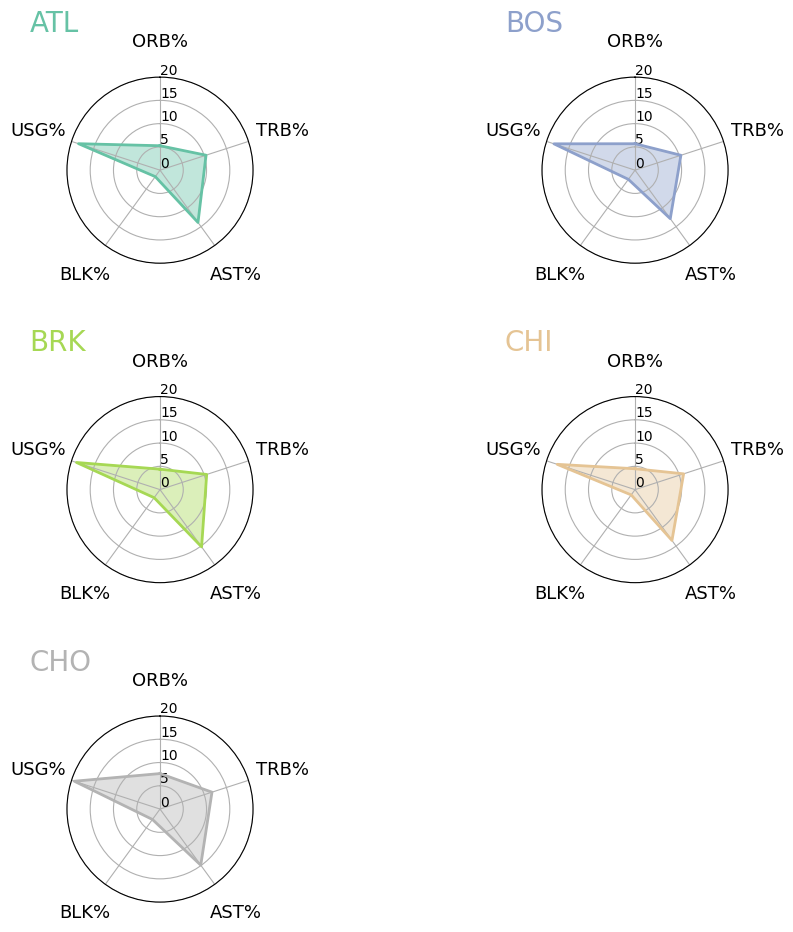

In [29]:
labels = df3.columns[1:]
num_labels = len(labels)

angles = [x / float(num_labels) * (2*pi) for x in range(num_labels)]
angles += angles[:1]

my_palette = plt.cm.get_cmap("Set2", len(df3.index))

fig = plt.figure(figsize = (10, 10))
fig.set_facecolor('white')

for i, row in df3.iterrows():
    color = my_palette(i)
    data = df3.iloc[i].drop("Tm").tolist()
    data += data[:1]
    
    ax = plt.subplot(3, 2, i + 1, polar = True)
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    plt.xticks(angles[:-1], labels, fontsize = 13)
    ax.tick_params(axis = "x", which = 'major', pad = 15)
    ax.set_rlabel_position(0)
    
    plt.yticks([0, 5, 10, 15, 20], ['0', '5', '10', '15', '20'], fontsize = 10)
    plt.ylim(0, 20)
    
    ax.plot(angles, data, color = color, linewidth = 2, linestyle = "solid")
    ax.fill(angles, data, color = color, alpha = 0.4)
    plt.title(row.Tm, size = 20, color = color, x = -0.2, y = 1.2, ha = 'left')
    
plt.tight_layout(pad = 3)
plt.show()

C:\Users\cw3714\AppData\Local\Temp\ipykernel_21256\3949244517.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  my_palette = plt.cm.get_cmap("Set2", len(df3.index))


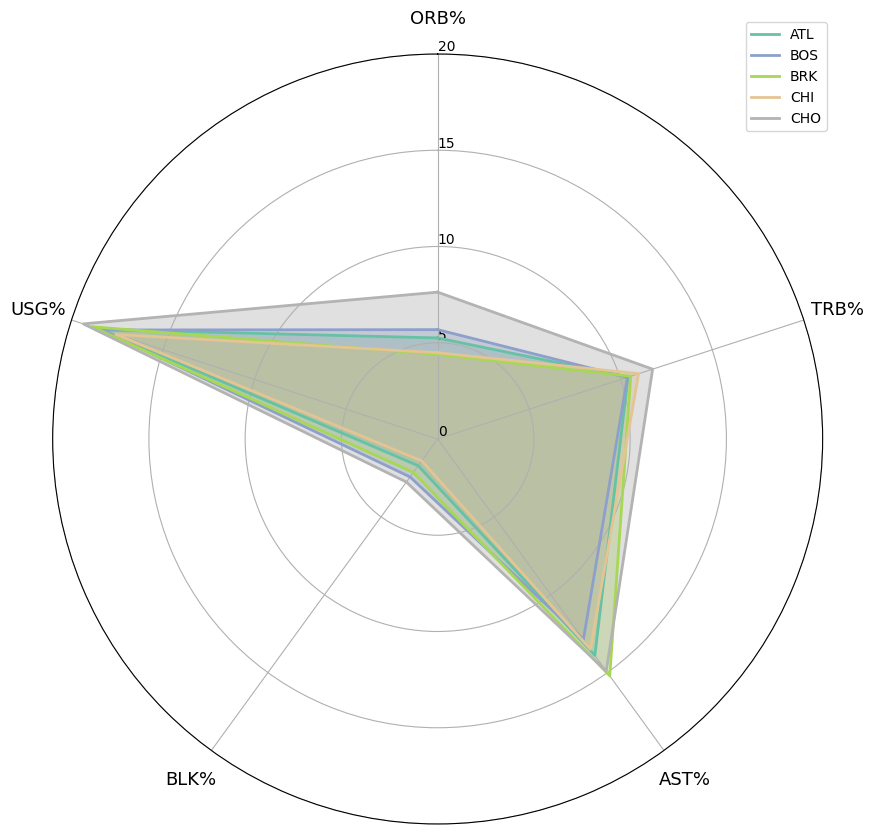

In [35]:
labels = df3.columns[1:]
num_labels = len(labels)

angles = [x / float(num_labels) * (2*pi) for x in range(num_labels)]
angles += angles[:1]

my_palette = plt.cm.get_cmap("Set2", len(df3.index))

fig = plt.figure(figsize = (10, 10))
fig.set_facecolor('white')
ax = fig.add_subplot(polar = True)

for i, row in df3.iterrows():
    color = my_palette(i)
    data = df3.iloc[i].drop("Tm").tolist()
    data += data[:1]
    
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    plt.xticks(angles[:-1], labels, fontsize = 13)
    ax.tick_params(axis = "x", which = 'major', pad = 15)
    ax.set_rlabel_position(0)
    
    plt.yticks([0, 5, 10, 15, 20], ['0', '5', '10', '15', '20'], fontsize = 10)
    plt.ylim(0, 20)
    
    ax.plot(angles, data, color = color, linewidth = 2, linestyle = "solid", label = row.Tm)
    ax.fill(angles, data, color = color, alpha = 0.4)
    
plt.legend(loc = [0.9, 0.9])
plt.show()

<Axes: >

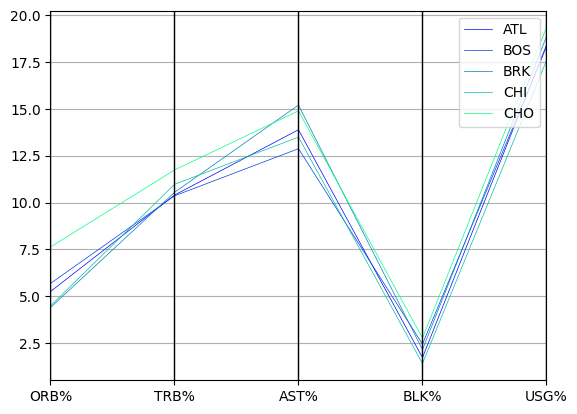

<Figure size 1600x800 with 0 Axes>

In [42]:
fig, axes = plt.subplots()
plt.figure(figsize = (16, 8))
parallel_coordinates(df3, "Tm", ax = axes, colormap = 'winter', linewidth = "0.5")
